In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline

#### Regression Model on Housing

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
all_data

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
20635,0.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20636,0.771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20637,0.923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20638,0.847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Housing data- data about neighborhoods. Average housing age, population, lat and long etc.

In [6]:
# target is price - this is the target, based on index.
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

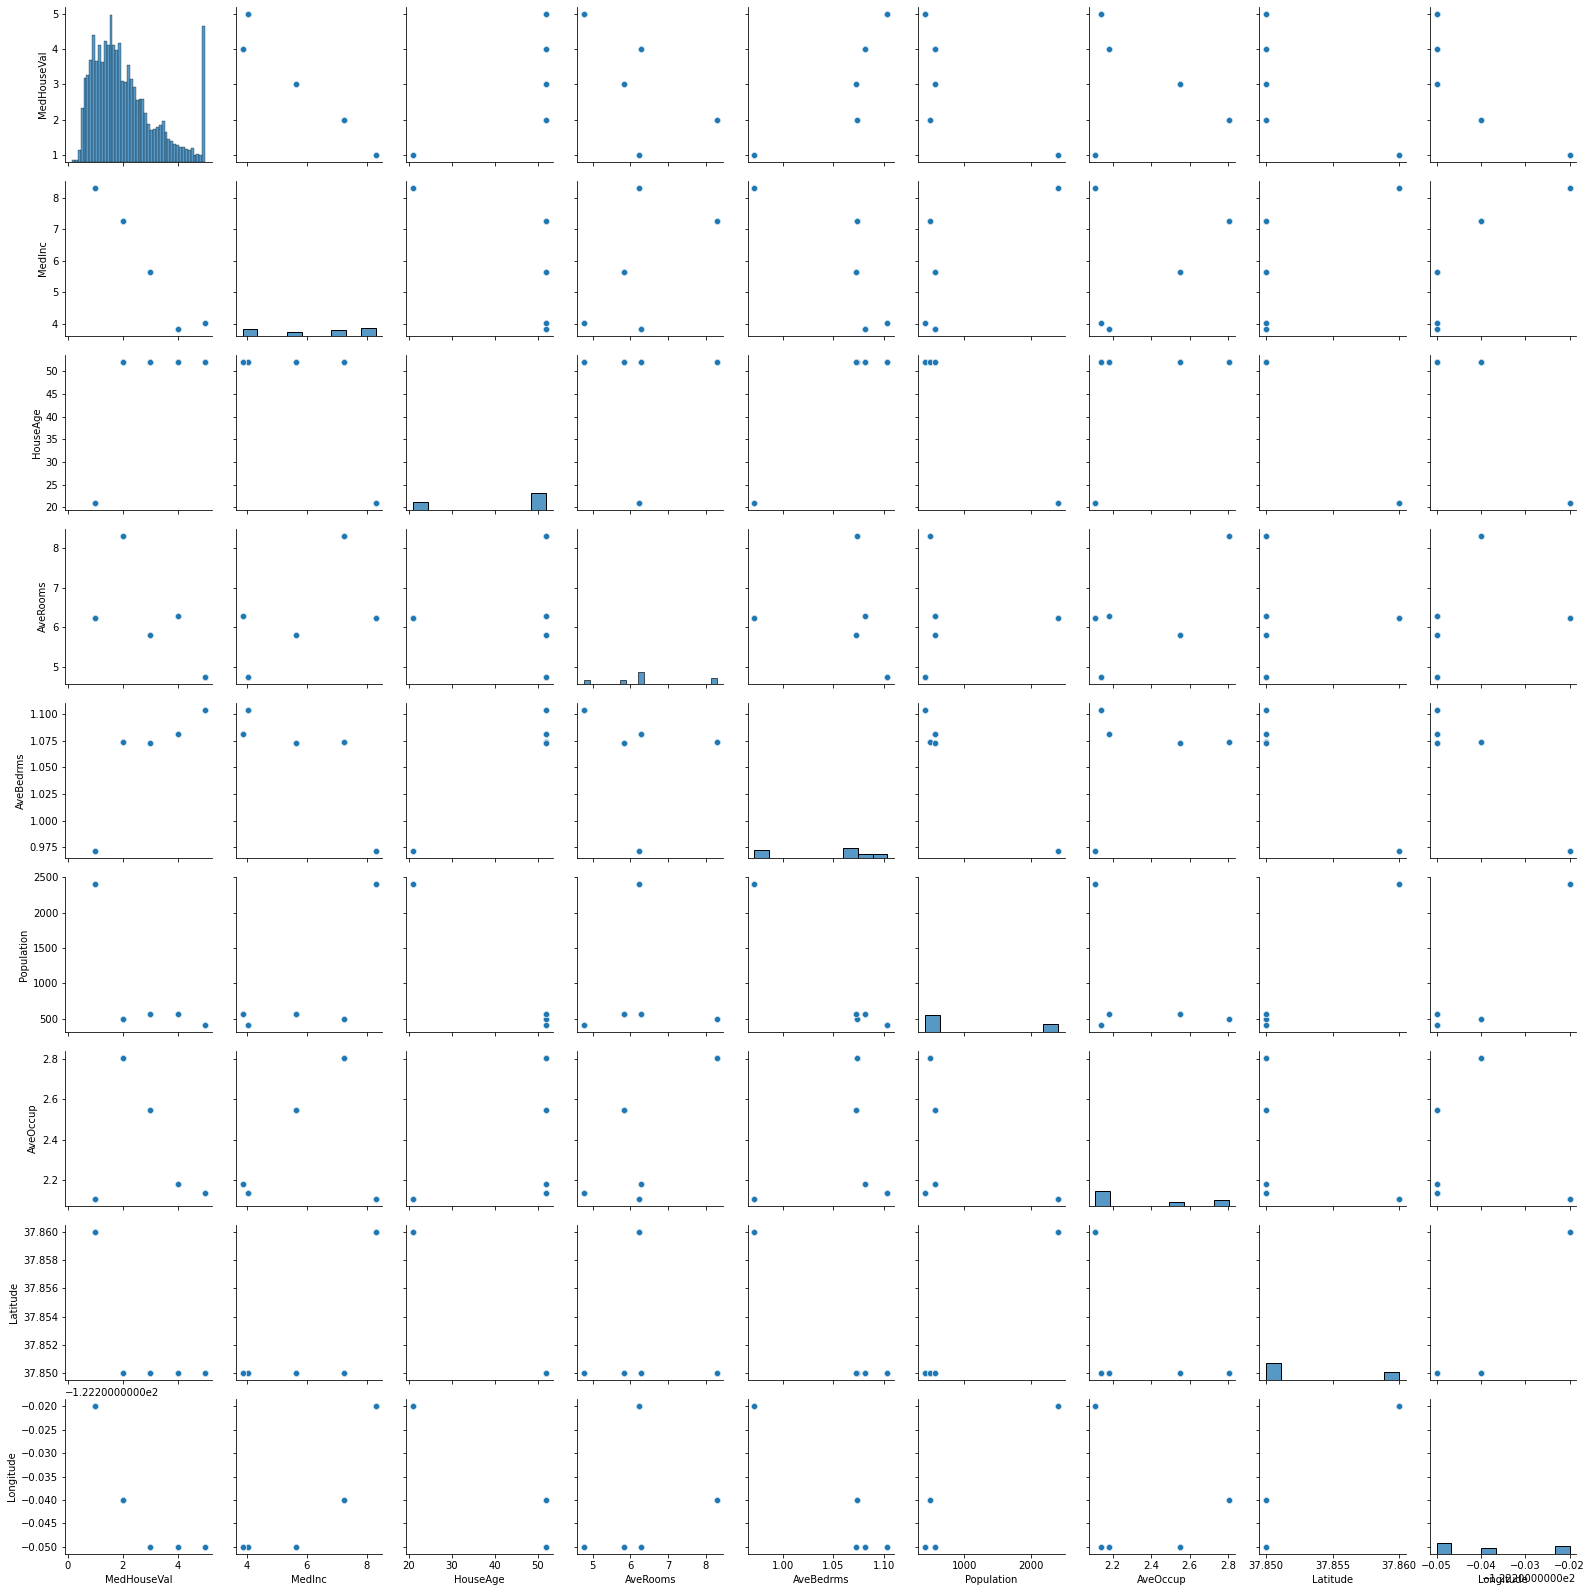

In [17]:
# What features should we use?
sns.pairplot(all_data);

In [19]:
# start with Median Income
X_simple = X[['MedInc']]

In [20]:
# Create train/test split 
#train and test split
X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(X_simple, y, random_state=42)


In [21]:
# this is our starting train set
X_simple_train.head()

,MedInc
8158,4.2143
18368,5.3468
19197,3.9191
3746,6.3703
13073,2.3684


In [22]:
# cross validate model
lr_simple = LinearRegression()
cross_val_score(lr_simple, X_simple_train, y_simple_train, scoring='neg_mean_squared_error')


array([-0.72264677, -0.66446447, -0.72625294, -0.67950539, -0.71498129])

In [32]:
cross_val_score(lr_simple, X_simple_train, y_simple_train, scoring='neg_mean_squared_error').mean()


-0.7015701726095294

This provided 5 scores ^ of the cross validation. But it's tough for us to see how these scores actually compare. The idea is that cross validation will allow us to select the best model. So, let's make another model to compare. 

In [25]:
# create polynomial features - quadratic model with quadratic features added to median income

# create the transformer
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# apply it to our data sets and store as variable
X_train_quad = poly_features.fit_transform(X_simple_train)
X_test_quad = poly_features.fit_transform(X_simple_test)

In [30]:
# cross validate the polynomial model and compare to earlier
cross_val_score(lr_simple, X_train_quad, y_simple_train, scoring='neg_mean_squared_error')



array([-0.71451058, -0.66049243, -0.72253198, -0.6713644 , -0.70911421])

In [31]:
cross_val_score(lr_simple, X_train_quad, y_simple_train, scoring='neg_mean_squared_error').mean()


-0.6956027209777113

In these two arrays ^, you can compare things positionally, because the cross validation will occur on the same section of data in each model. 

So, -.714 is comparatble to -.722. But the easier way is to compare the means of each cross val. 

The results here are in logs- so they're difficult to interpret...but the results are fairly similar. Sometimes the best solution is the simplest- less time, less computing etc. So in this case, the linear regression might be just as solid as the quadratic. 

In [37]:
# consider other features - new model
X_complex = [[X]]
X_train_complex, X_test_complex = train_test_split(X, random_state=42)

In [13]:
# build polynomial features
poly_features = PolynomialFeatures(include_bias=False)


In [35]:
# build optimal in pipeline - just put the transformation and estimator together in this pipeline
# pipeline takes a list of tuples.
# any time you have to transform features or need to fill in missing data etc
# then you should use a pipeline to simplify everything. 
poly_pipe= Pipeline([('poly', poly_features), #first, create poly features
                    ('model', lr_simple)]) #build model on poly features

# this now acts like other estimators

# first it will add poly features
# then it will run the model

In [39]:
# cross validate
cross_val_score(poly_pipe, X_train_complex, y_simple_train, scoring='neg_mean_squared_error')

array([  -0.91630961,   -0.40628413, -343.4614615 ,   -0.42043942,
         -2.87640119])

In [40]:
# fit the pipeline

cross_val_score(poly_pipe, X_train_complex, y_simple_train, scoring='neg_mean_squared_error').mean()

-69.6161791724531

In [15]:
# which is best??
# probably the simplest one in this case- the median income
# the poly model now has a ton of features, because it will have all of the
# polys for all of the features and then it will have FOILS for all the features. 